In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
from collections import Counter

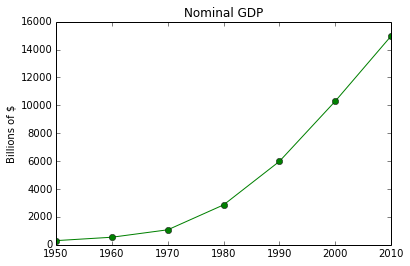

In [3]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.title("Nominal GDP")
plt.ylabel("Billions of $")
plt.show()

In [4]:
height_weight_age = [70, 170,40 ] 
grades = [95,80,75,62]

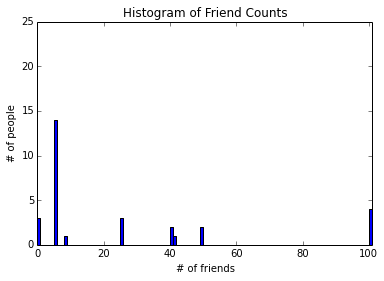

In [11]:
num_friends = [100, 49, 41, 40, 25, 25, 25, 40, 49, 100, 100, 100, 0, 0, 0, 
              5,5,5,5,5,5,5,5,5,5,5,5,5,5,8]
friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
               
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [13]:
def mean(x):
    return sum(x) / len(x)

mean(num_friends)

25

In [14]:
def data_range(x):
    return max(x) - min(x)
data_range(num_friends)

100

In [20]:
import random

def random_kid():
    return random.choice(["boy", "girl"])
    
both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid() 
    older = random_kid() 
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1
        
print "P(both | older):", both_girls / older_girl 
print "P(both | either): ", both_girls / either_girl

P(both | older): 0
P(both | either):  0


In [22]:
def uniform_pdf(x): 
    return 1 if x>=0 and x<1 else 0

def uniform_cdf(x):
    if x < 0: return 0
    elif x < 1: return x
    else: return 1

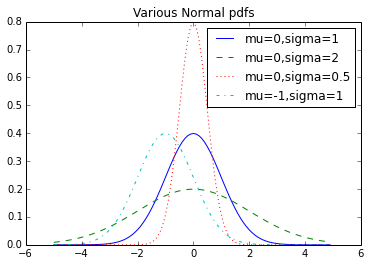

In [26]:
import math

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1') 
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2') 
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5') 
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1') 
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

In [33]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0
def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2


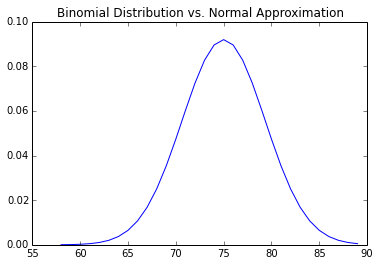

In [34]:
def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()], 0.8,
            color='0.75')
    mu=p*n
    sigma = math.sqrt(n * p * (1 - p))
    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs] 
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()
    
make_hist(0.75, 100, 10000)